In [1]:
from ancinf.utils.simulate import collectparams, simulateandsaveoneparam
from ancinf.utils.runheuristic import run as heurrun

import numpy as np
import time

rng = np.random.default_rng(2023)
offset = 8.0

valshare = 0.2
testshare = 0.2
itercount = 10    

/home/dglyzin/.local/lib/python3.10/site-packages/torch_geometric/typing.py:49: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /opt/conda/lib/python3.10/site-packages/libpyg.so: undefined symbol: _ZNK3c104impl13OperatorEntry20reportSignatureErrorENS0_12CppSignatureE
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/dglyzin/.local/lib/python3.10/site-packages/torch_geometric/typing.py:103: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /opt/conda/lib/python3.10/site-packages/libpyg.so: undefined symbol: _ZNK3c104impl13OperatorEntry20reportSignatureErrorENS0_12CppSignatureE
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [2]:
folder = "/home/dglyzin/identityByDescent/datasets-pure"
params = collectparams(folder, override_popsizes=False)
current_dataset = 'Scandinavia_weights_partial_labels.csv'

processing file Scandinavia_weights_partial_labels.csv
dropping Russians
dropping Tatars,Volga-Tatars,Mishar-Tatars,Kryashens
dropping English
dropping Finns
Unique ids in ibd datafile: 2006
Filter out all classes smaller than  190
Removing following classes:
Sephardim 1
Puerto-Ricans 1
Tamils 1
Evenks 1
Pashtuns 1
Mexicans 1
Ossetians 1
Czechs,Slovaks 1
Kyrgyz 1
Siberian-Tatars 1
Kumyks 1
Jews-Azerbaijani 1
Uzbeks 1
Chechens 1
South-Italy 1
Armenians,Hemshins 2
Azerbaijanis,Iranians,Turks,Yazidis 2
Kazakhs 2
Albanians,Greeks 2
Ket 3
Moldovans 3
Basques 3
Spaniards 3
Roma 4
Balkan 5
Kabardians,Cherkess,Adygeans 6
Mari 7
Khanty,Mansi 8
Tuscans 8
Poles 8
Udmurts,Besermyan 9
Scots 11
Dolgans,Yakuts 11
Mordvins 14
Komi 15
Sami 20
French 21
Irish 26
Estonians 28
Belarusians 33
Ukrainians 40
Lithuanians 47
Bashkirs 55
Belgium 57
Karelians,Veps 60
Chuvash 87
Germans 126
Ashkenazim 178
Total 919 removed
Remaining classes:
Danes 190
Swedes 378
Norwegians 519
dropping Estonians
dropping Dolgans,

In [3]:
import json
import os
with open(os.path.join(folder, "meta.json")) as f:
    metadict = json.load(f)
load_args = metadict[current_dataset]
original_res = heurrun(rng, os.path.join(folder, current_dataset), valshare, testshare, itercount, debug=False, filter_params=load_args)
print(original_res)

bad partition on iter 0
bad partition on iter 1
bad partition on iter 2
bad partition on iter 3
bad partition on iter 4
bad partition on iter 6
bad partition on iter 7
bad partition on iter 8
{'IbdSumPerEdge': {'mean': 0.8619830779894802, 'std': 0.02459207093324024}, 'IbdSum': {'mean': 0.9523135302034165, 'std': 0.011395440951821992}, 'LongestIbd': {'mean': 0.9293252419685413, 'std': 0.015837174110659203}, 'SegmentCountWMult': {'mean': 0.933962531550474, 'std': 0.013899135072260163}, 'SegmentCountPerClassize': {'mean': 0.9817872406892658, 'std': 0.0072862876434416236}, 'SegmentCount': {'mean': 0.9271750453593703, 'std': 0.013383973613749194}}


In [4]:
scandparams = params[current_dataset]
print(scandparams)

{'pop_names': ['Norwegians', 'Swedes', 'Danes'], 'pop_sizes': [519, 377, 190], 'edge_probability': [[0.07716800202349336, 0.011049610810424045, 0.0031132745157691918], [0.011049610810424045, 0.060471809921553134, 0.00131229931592908], [0.0031132745157691918, 0.00131229931592908, 0.028460038986354776]], 'mean_weight': [[16.359806075388025, 10.790922252543941, 10.38897013029316], [10.790922252543941, 15.21641472468502, 9.905714680851064], [10.388970130293162, 9.905714680851064, 12.605865479452056]]}


In [8]:
def scalepopulations(baseparams, factor):
    newparams={}
    newparams['pop_names'] = baseparams['pop_names']
    newparams['edge_probability'] = baseparams['edge_probability']
    newparams['mean_weight'] = baseparams['mean_weight']
    pop_sizes = baseparams['pop_sizes']
    newparams['pop_sizes'] = [round(size*factor) for size in pop_sizes]
    return newparams

fnamebase = "/home/dglyzin/identityByDescent/datasets-tmp/Scandinavia"


start = time.time()
factors = [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.75, 2, 3]

total_pops = []
results = []

for idx, factor in enumerate(factors):
    print(f"=====Generation {idx} for factor {factor}====")
    fname = fnamebase+"_gen"+str(idx)+".csv"
    params = scalepopulations(scandparams, factor)
    print("population sizes:", params["pop_sizes"])
    
    simulateandsaveoneparam(params, offset, fname, rng)
    res = heurrun(rng, fname, valshare, testshare, itercount, debug=False)
    print(res)
    total_pops.append(np.sum(np.array(params["pop_sizes"])))
    results.append(res)
    
    finish = time.time()
    print(f"finished in {finish-start}")
    start = finish

=====Generation 0 for factor 0.5====
population sizes: [260, 188, 95]
bad partition on iter 0
bad partition on iter 1
bad partition on iter 2
bad partition on iter 3
bad partition on iter 4
bad partition on iter 5
bad partition on iter 6
bad partition on iter 8
bad partition on iter 9
{'IbdSumPerEdge': {'mean': 0.8983205358284433, 'std': 0.023585020105420438}, 'IbdSum': {'mean': 0.9604125173986837, 'std': 0.013261438193935639}, 'LongestIbd': {'mean': 0.945617686499884, 'std': 0.01820558587300734}, 'SegmentCountWMult': {'mean': 0.9241266240124538, 'std': 0.02555632748535498}, 'SegmentCountPerClassize': {'mean': 0.9805986671994328, 'std': 0.01595822034917412}, 'SegmentCount': {'mean': 0.9241266240124538, 'std': 0.02555632748535498}}
finished in 0.6741349697113037
=====Generation 1 for factor 0.6====
population sizes: [311, 226, 114]
bad partition on iter 0
bad partition on iter 3
bad partition on iter 4
bad partition on iter 5
bad partition on iter 6
bad partition on iter 8
bad partition

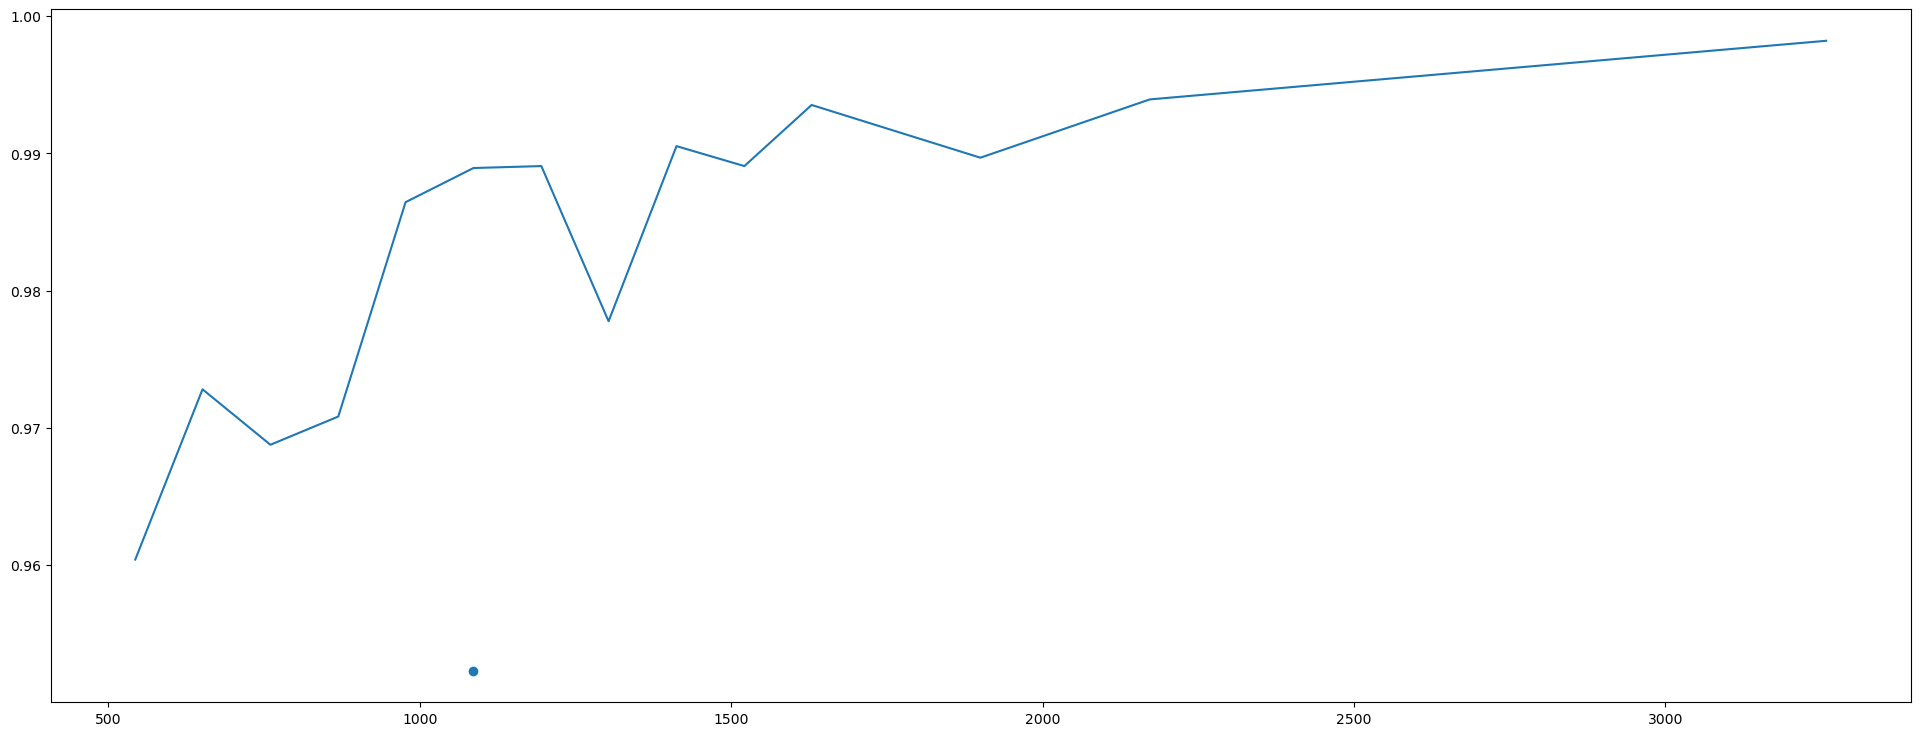

In [12]:
#plot the dynamics and the original 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (24,9)

ibdsum_perf = [res['IbdSum']['mean'] for res in results ]

plt.plot(total_pops, ibdsum_perf)
plt.scatter([1086], [0.9523135302034165])

In [9]:
total_pops

[543, 651, 760, 869, 977, 1086, 1195, 1303, 1412, 1521, 1629, 1900, 2172, 3258]